In [16]:
from fastai import *
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.collab import *
import numpy as np
import pandas as pd
from pathlib import Path

In [17]:
path = Path('data/')

df = pd.read_csv(path/'train_dropped_290_without_nans.csv')
test = pd.read_csv(path/'test_dropped_290_without_nans.csv')

y_train=pd.read_csv(path/'y_train.csv')['Culture']
df['Culture']=y_train-1

In [18]:
CAT_NAMES = ['0','1','2']
CONT_NAMES = list((df.drop(['0','1','2','Culture'],axis=1)).columns)
TARGET='Culture'

df[TARGET] = df[TARGET].astype('category')
for i in CAT_NAMES:
    df[i]=df[i].astype('category')
    test[i]=test[i].astype('category')

In [19]:
procs = [Categorify, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

dls = TabularDataLoaders.from_df(df, 
                                 y_names=TARGET, 
                                 cat_names=CAT_NAMES,
                                 cont_names=CONT_NAMES,
                                 procs=procs,
                                 splits=splits)

In [20]:
class_count_df = df.groupby(TARGET).count()
classes=pd.Series(list(class_count_df['0']))
new_weights=[]
for i in classes:
    new_weights.append((classes.sum()) / (2.0 * i))
class_weights=torch.FloatTensor(new_weights)

In [27]:
metrics = F1Score(average='weighted')
loss_func = CrossEntropyLossFlat(weight=class_weights)
learn = tabular_learner(dls,layers=[800,676], loss_func=loss_func,metrics=[metrics])

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=0.001737800776027143)

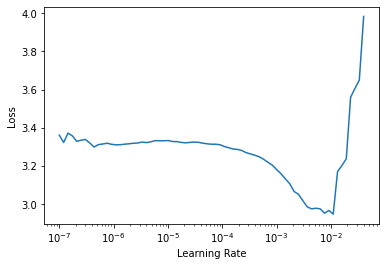

In [28]:
learn.lr_find()

In [29]:
learn.fit(n_epoch=7,lr=0.0004,wd=0.1)

epoch,train_loss,valid_loss,f1_score,time
0,2.740091,2.355708,0.319102,00:01
1,1.775867,2.039393,0.612665,00:01
2,1.067715,2.118575,0.655638,00:01
3,0.602043,2.396342,0.659933,00:01
4,0.345702,2.753065,0.649469,00:01
5,0.205832,2.625307,0.663203,00:01
6,0.135874,2.772436,0.674119,00:01


In [30]:
learn.show_results()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,Culture,Culture_pred
0,5.0,1288.0,213.0,1.082977,1.078592,1.073177,1.065250,1.055709,1.044722,1.032954,1.024028,1.028643,1.037639,1.046428,1.054503,1.061906,1.067305,1.079665,1.095066,1.108647,1.119706,1.129910,1.137180,1.143411,1.147397,1.151040,1.152051,1.154086,1.153362,1.149037,1.142194,1.132296,1.119646,1.107522,1.093390,1.080370,1.067555,1.053544,1.038944,1.022629,1.003965,0.996893,0.988094,0.976539,0.963603,0.949916,0.935828,0.924315,0.914692,0.906233,0.899130,0.895259,0.893394,0.894041,0.896235,0.897425,0.897912,0.897031,0.894547,0.890029,0.884415,0.877361,0.868729,0.860028,0.850636,0.840905,0.831868,0.822504,0.815684,0.809226,0.802224,0.815336,0.840100,0.868820,0.893070,0.911536,0.928408,0.944376,0.960258,0.975432,0.990426,1.006017,1.021572,1.037457,1.054173,1.071410,1.088252,1.106371,1.124058,1.141108,1.157228,1.173315,1.188982,1.202870,1.213740,1.221602,1.227933,1.232939,1.236824,1.240091,1.243110,1.245059,1.245792,1.244091,1.239349,1.231454,1.221622,1.210730,1.198289,1.188603,1.179408,1.170758,1.162403,1.154085,1.146056,1.138014,1.129704,1.121121,1.112899,1.106342,1.100475,1.094389,1.087699,1.080116,1.071670,1.062361,1.052806,1.042956,1.033128,1.022467,1.011202,1.000219,0.988489,0.977555,0.967416,0.958813,0.951865,0.946754,0.942412,0.939533,0.936933,0.933946,0.928901,0.919857,0.906239,0.887499,0.863792,0.834647,0.798690,0.631105,0.460328,0.285344,0.108386,-0.072018,-0.256779,-0.445434,-0.539916,-0.634665,-0.729983,-0.825137,-0.918594,-1.011425,-1.101676,-1.188156,-1.274531,-1.355664,-1.428464,-1.492690,-1.549230,-1.599702,-1.641039,-1.636779,-1.609977,-1.579331,-1.559201,-1.542980,-1.535555,-1.528966,-1.522525,-1.514597,-1.505129,-1.495393,-1.490217,-1.484808,-1.480370,-1.474687,-1.468236,-1.458771,-1.445367,-1.430842,-1.414378,-1.396565,-1.378481,-1.365014,-1.354768,-1.346110,-1.333858,-1.313350,-1.286801,-1.255998,-1.221676,-1.185082,-1.146303,-1.107991,-1.070310,-1.034112,-1.000440,-0.970015,-0.944391,-0.925196,-0.913345,-0.910356,-0.922062,-0.949944,-0.991485,-1.042945,-1.100757,-1.160986,-1.219967,-1.273908,-1.317548,-1.346909,-1.358218,-1.358104,-1.357777,-1.356106,-1.354950,-1.354706,-1.354201,-1.353610,-1.352576,-1.351460,-1.349885,-1.347678,-1.344639,-1.341548,-1.340418,-1.338500,-1.336701,-1.334575,-1.332029,-1.329335,-1.326907,-1.326930,-1.328783,-1.334106,-1.341837,-1.349811,-1.356467,-1.362577,-1.366951,-1.373214,-1.380329,-1.384673,-1.386799,-1.385162,-1.380988,-1.372784,-1.361314,-1.349028,-1.332474,-1.255406,-1.177804,-1.097557,-1.016702,-0.932917,-0.847115,-0.761112,-0.673499,-0.586334,-0.499748,-0.412045,-0.325172,-0.237561,-0.149558,-0.062286,0.025485,0.110811,0.195986,0.291986,0.406483,0.535089,0.670964,0.805488,0.934107,1.050125,1.122751,1.193147,1.261408,1.331971,1.400985,1.469984,1.536653,3.0,3.0
1,4.0,645.0,525.0,0.472660,0.465050,0.456722,0.448351,0.438200,0.428483,0.418782,0.412646,0.416572,0.424766,0.431005,0.437095,0.443199,0.447875,0.458048,0.4

In [31]:
import pickle

In [32]:
learn.export('model.pkl')

In [34]:
x = load_learner('model.pkl')

In [46]:
rows=[]
for i in test.index:
    row, clas, probs=x.predict(test.iloc[i])
    rows.append(row['Culture'][0])
rows=np.asarray(rows)
rows+=1
pd.Series(rows).to_csv('preds/fastai.csv', index=False, header=['Culture'])

array([[ 4.],
       [12.],
       [21.],
       [16.],
       [ 4.],
       [ 4.],
       [21.],
       [ 8.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 7.],
       [ 4.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 4.],
       [ 7.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 7.],
       [10.],
       [ 7.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 9.],
       [ 2.],
       [ 3.],
       [16.],
       [ 4.],
       [12.],
       [ 7.],
       [ 8.],
       [14.],
       [ 7.],
       [ 3.],
       [ 4.],
       [ 7.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [13.],
       [ 2.],
       [ 7.],
       [ 8.],
       [ 4.],
       [ 5.],
       [ 7.],
       [ 4.],
       [10.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 8.],
       [10.],
       [ 5.],
       [ 3.],
       [ 4.],
       [ 7.],
       [ 4.],
      